<a href="https://colab.research.google.com/github/Um333r/Build-a-Prediction-Model-for-Salary_Hike./blob/master/Simple_Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Simple Linear Regression Assignment**

Data Set : Salary_Data
Building a Prediction Model for Salary Hike

**1. Import Necessary libraries**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings
warnings.filterwarnings('ignore')

2. Import Data

In [3]:
salary_details = pd.read_csv('/content/Salary_Data (2).csv')
salary_details

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


3. Data Understanding

a) Initial Analysis:

In [4]:
salary_details.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
salary_details.shape


(30, 2)

In [6]:
salary_details.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
salary_details.isna().sum()


YearsExperience    0
Salary             0
dtype: int64

b) Correlation Matrix :


In [8]:
corr_matrix = salary_details.corr()
corr_matrix


,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


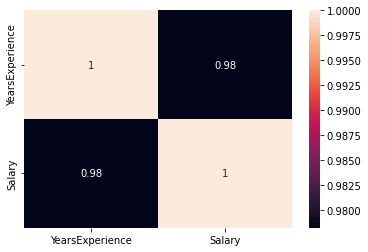

In [9]:
sns.heatmap(data = corr_matrix,annot = True)
plt.show()

5. Perform Assumption Check


a) Outlier Test Using Box Plot :

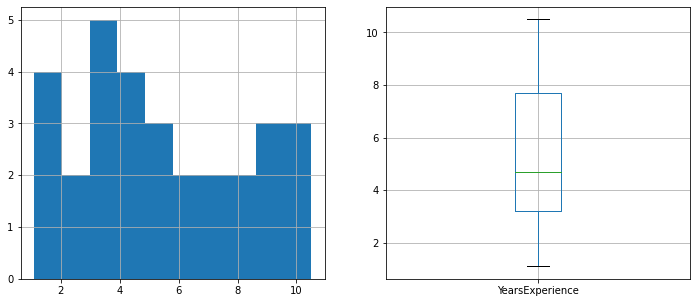

In [10]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
salary_details['YearsExperience'].hist()
plt.subplot(1,2,2)
salary_details.boxplot(column = ['YearsExperience'])

plt.show()

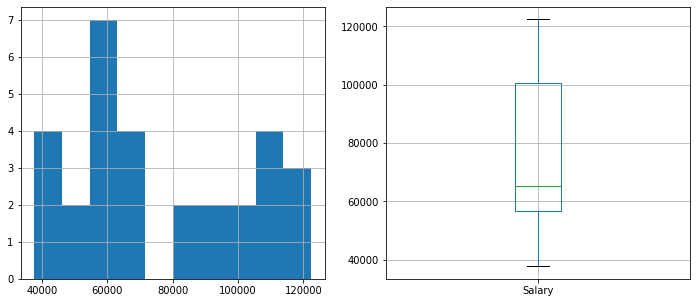

In [11]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
salary_details['Salary'].hist()
plt.subplot(1,2,2)
salary_details.boxplot(column = ['Salary'])

plt.show()

From the above histogrms and boxplots, we found that there is no outleirs present inside the YearsExperience and Salary data.

**b) Normality / Distribution Test Using Distplot :**

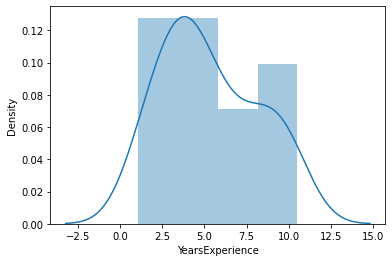

In [12]:
sns.distplot(salary_details['YearsExperience'])
plt.show()


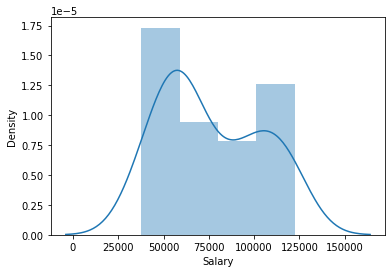

In [13]:
sns.distplot(salary_details['Salary'])
plt.show()

Normality Test Failed

**7. Model Building || 8. Model Training**

Now Try to fit Model for Salary Hike

**Model 1: Without Applying any Transformation**

Using Statsmodel



In [14]:
model_1 = smf.ols(formula = 'YearsExperience~Salary', data = salary_details).fit()
model_1

In [15]:
#coefficient
model_1.params

Intercept   -2.383161
Salary       0.000101
dtype: float64

In [16]:
model_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 20 Jan 2023   Prob (F-statistic):           1.14e-20
Time:                        17:28:01   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
Salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the Above OLS Regression Result the R-Squared value is 0.957 > 0.75 and we can say that this Model is good to Predict Salary_hike and p-value < 0.05 and it is significant model

**Model 2: Apply Log Transformation of Y**

In [17]:
model_2 = smf.ols(formula = 'Salary~np.log(YearsExperience)',data = salary_details).fit()
model_2

In [18]:
model_2.params


Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [19]:
model_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Fri, 20 Jan 2023   Prob (F-statistic):           3.25e-13
Time:                        17:29:24   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Model 3: Apply Log Transformation of X**

In [20]:
model_3 = smf.ols(formula = 'np.log(Salary)~YearsExperience',data = salary_details).fit()
model_3

In [21]:
model_3.params


Intercept          10.507402
YearsExperience     0.125453
dtype: float64

In [22]:
model_3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Fri, 20 Jan 2023   Prob (F-statistic):           7.03e-18
Time:                        17:30:10   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Model 4: Apply Log Transformation of X and Y**

In [23]:
model_4 = smf.ols(formula = 'np.log(Salary)~np.log(YearsExperience)',data = salary_details).fit()
model_4

In [24]:
model_4.params

Intercept                  10.328043
np.log(YearsExperience)     0.562089
dtype: float64

In [25]:
model_4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Fri, 20 Jan 2023   Prob (F-statistic):           7.40e-16
Time:                        17:30:56   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Model 5: Apply Square Root Transformation**

In [29]:
model_5 = smf.ols(formula = 'Salary~np.sqrt(YearsExperience)',data = salary_details).fit()
model_5


In [30]:
model_5.params


Intercept                  -16055.769117
np.sqrt(YearsExperience)    41500.680583
dtype: float64

In [31]:
model_5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Fri, 20 Jan 2023   Prob (F-statistic):           8.57e-18
Time:                        17:33:21   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(YearsExperience)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**CONCLUSION** = Comparing between all Models we got to know that without applying any transformation for the Model_1 we got the Higher R-squared Value i.e. 0.957 as comapare to all Model.

Hence the Model_1 is better model to predict Salary_hike